## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
def load_astar_data(filename):
    lines = open(filename, 'r').read().split('\n')[:-1]
    
    gate_count = np.zeros(N, dtype=int)
    t_count = np.zeros(N, dtype=int)
    time = np.zeros(N, dtype=float)
    err = np.zeros(N, dtype=float)

    for x in lines:
        cols = x.split(' ')
        i = int(cols[0].split('.')[0])

        gate_count[i] = int(cols[3].split(',')[0])
        t_count[i] = int(cols[5].split(',')[0])
        time[i] = float(cols[7].split(',')[0].split('s')[0])
        err[i] = float(cols[9])

    return (gate_count, t_count, time, err)

In [4]:
def load_trasyn_data(filename):
    lines = open(filename, 'r').read().split('\n')[1:-1]
    
    gate_count = np.zeros(N, dtype=int)
    t_count = np.zeros(N, dtype=int)
    time = np.zeros(N, dtype=float)
    err = np.zeros(N, dtype=float)

    for x in lines:
        cols = x.split(' ')
        i = int(cols[0].split('.')[0])

        time[i] = float(cols[3])
        t_count[i] = int(cols[6])
        gate_count[i] = int(cols[10])
        err[i] = float(cols[13])

    return (gate_count, t_count, time, err)

In [5]:
def plot_metric(ax, xs, ys, name, eqline=True):
    ax.set_title(name)
    ax.set_xlabel('Trasyn')
    ax.set_ylabel('A* search')

    if eqline:
        L = min(min(xs), min(ys))
        R = max(max(xs), max(ys))
        ax.plot(np.linspace(L, R), np.linspace(L, R), linestyle='--', \
                color='gray', linewidth=1.5, zorder=-1, alpha=0.7)
        
    ax.scatter(xs, ys, s=10, alpha=0.5)
    ax.grid()
    ax.set_axisbelow(True)

In [6]:
def print_comparison(astar_metric, tr_metric):
    gate_diff = astar_metric - tr_metric
    num_less = np.where(gate_diff < 0)[0].shape[0]
    num_same = np.where(gate_diff == 0)[0].shape[0]
    num_worse = N - num_less - num_same
    print('Better: %.1f%%' % (100 * num_less / N))
    print('Same: %.1f%%' % (100 * num_same / N))
    print('Worse: %.1f%%' % (100 * num_worse / N))

In [7]:
def plot_benchmark(astar_file, trasyn_file):
    astar_gate, astar_t, astar_time, astar_err = load_astar_data(astar_file)
    tr_gate, tr_t, tr_time, tr_err = load_trasyn_data(trasyn_file)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

    plot_metric(ax1, tr_gate, astar_gate, 'Gate count')
    plot_metric(ax2, tr_t, astar_t, 'T count')
    plot_metric(ax3, tr_time, astar_time, 'Time', eqline=False)
    plt.tight_layout()

    print('== A* vs Trasyn gate count ==')
    print_comparison(astar_gate, tr_gate)

    print('== A* vs Trasyn T count ==')
    print_comparison(astar_t, tr_t)

## One Qubit

== A* vs Trasyn gate count ==
Better: 68.1%
Same: 31.6%
Worse: 0.3%
== A* vs Trasyn T count ==
Better: 0.0%
Same: 88.3%
Worse: 11.7%


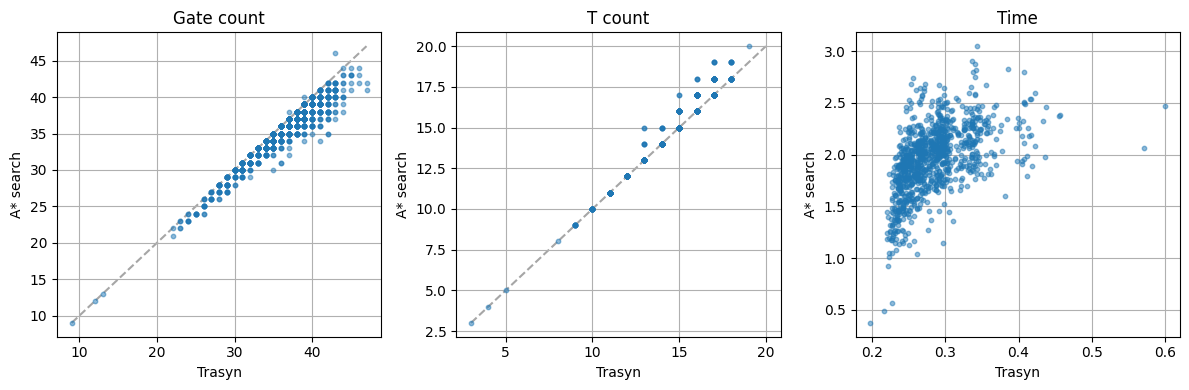

In [8]:
plot_benchmark('./astar-1q-e0.01-p1.0-b100.txt', './trasyn-1q-e0.01.txt')
plt.savefig('1q-bench.png')

## Two Qubit

== A* vs Trasyn gate count ==
Better: 100.0%
Same: 0.0%
Worse: 0.0%
== A* vs Trasyn T count ==
Better: 99.4%
Same: 0.6%
Worse: 0.0%


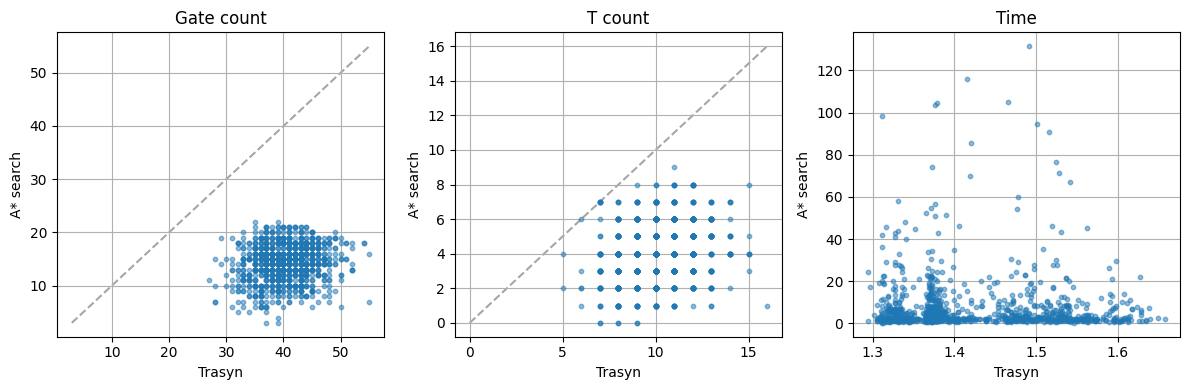

In [47]:
plot_benchmark('./astar-2q-e0.5-p1.0-b100.txt', './trasyn-2q-e0.25.txt')
plt.savefig('2q-bench.png')